[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22]
/home/mel_yang/projects/neolithic/Dstats/ind_A_v13_TBH5.D.all.Bbdong_PDEAS_PDEAS_Mbuti.Zmat
/home/mel_yang/projects/neolithic/Dstats/ind_A_v13_TBH5.D.all.Boshan_PDEAS_PDEAS_Mbuti.Zmat
/home/mel_yang/projects/neolithic/Dstats/ind_A_v13_TBH5.D.all.HDYM1_PDEAS_PDEAS_Mbuti.Zmat
/home/mel_yang/projects/neolithic/Dstats/ind_A_v13_TBH5.D.all.Boisman_MN_PDEAS_PDEAS_Mbuti.Zmat
/home/mel_yang/projects/neolithic/Dstats/ind_A_v13_TBH5.D.all.Linzi_PDEAS_PDEAS_Mbuti.Zmat


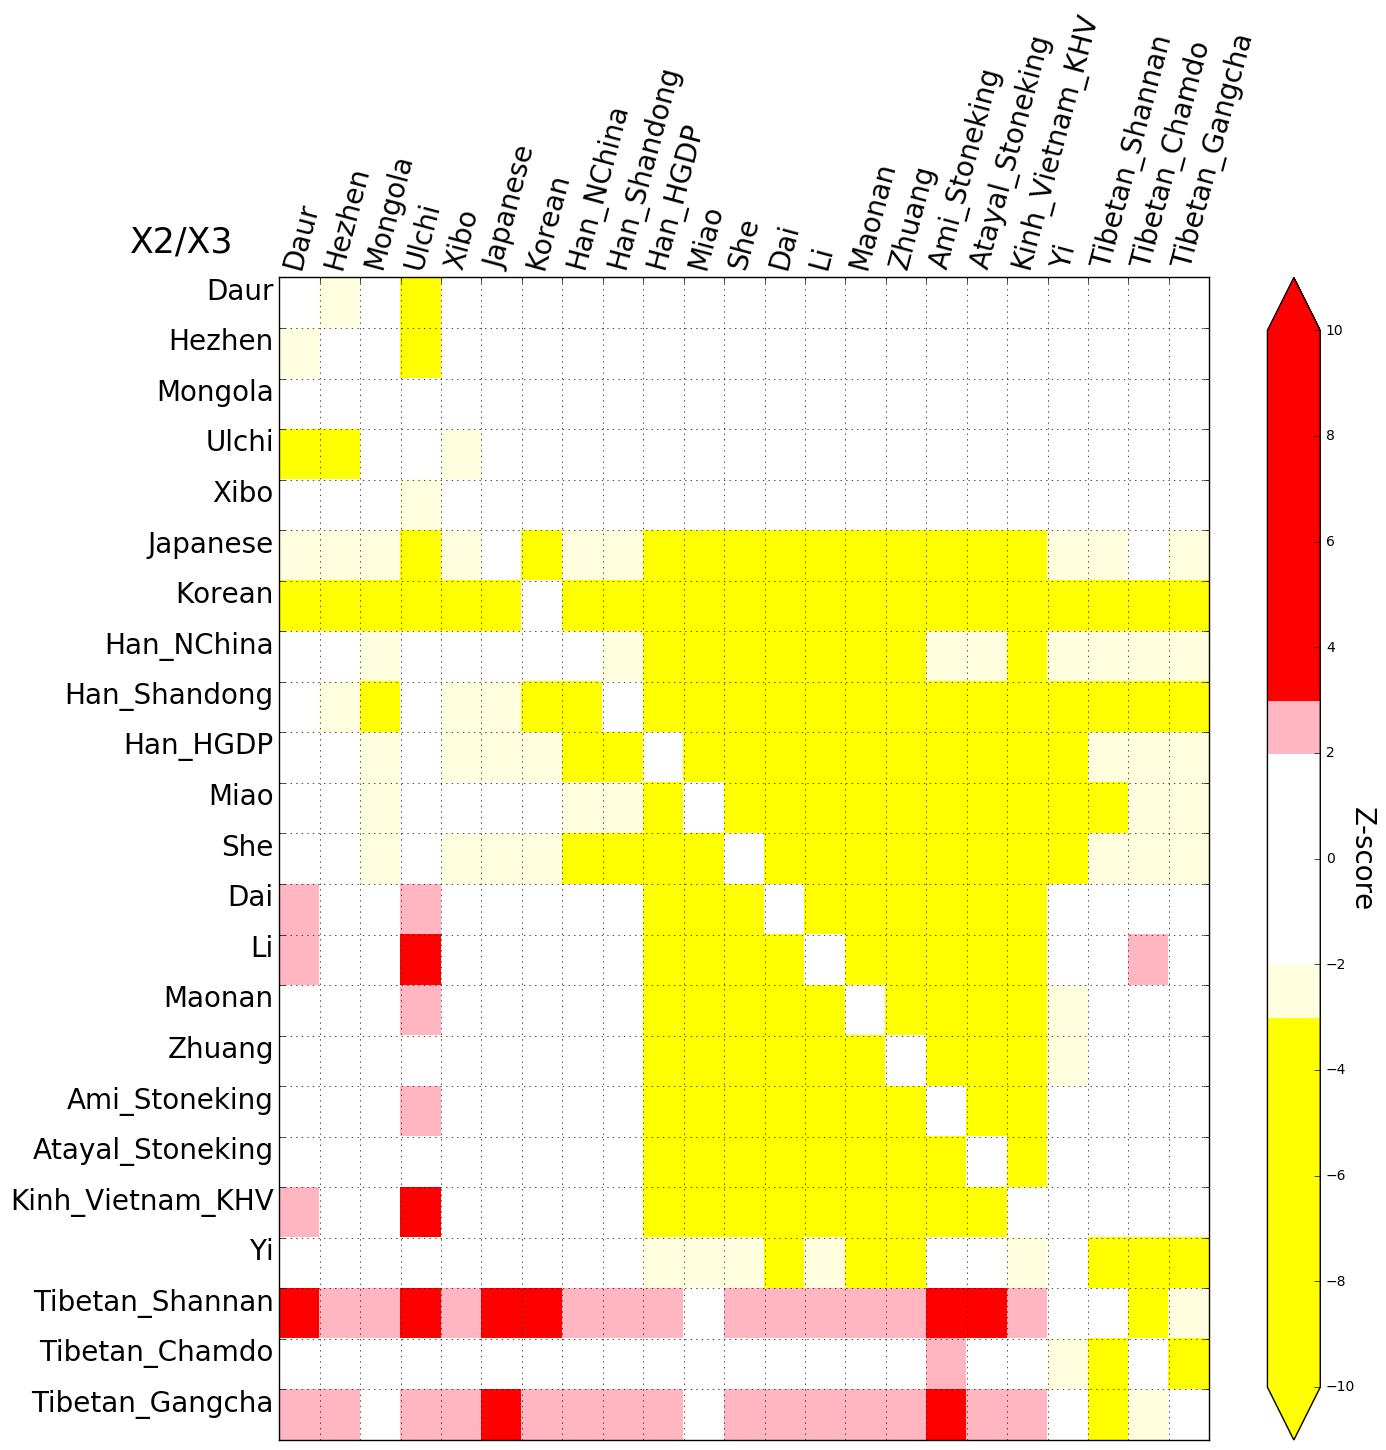

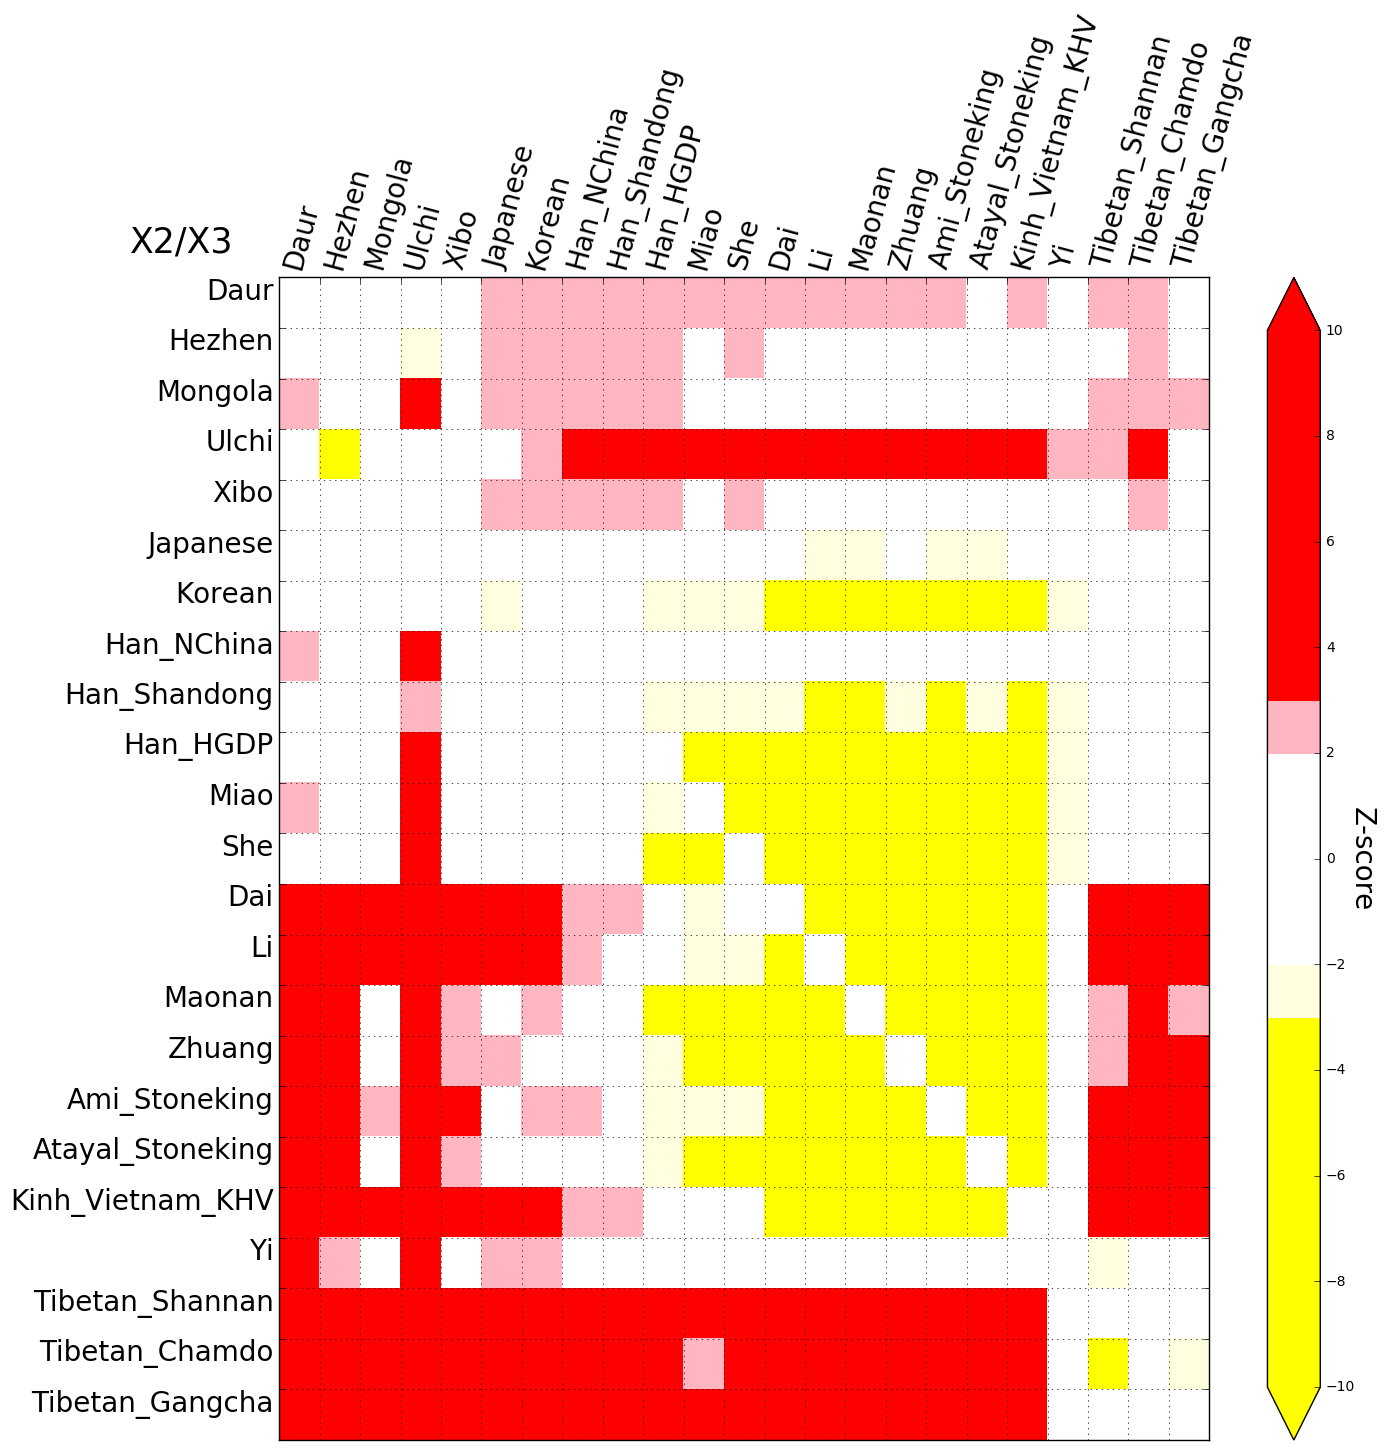

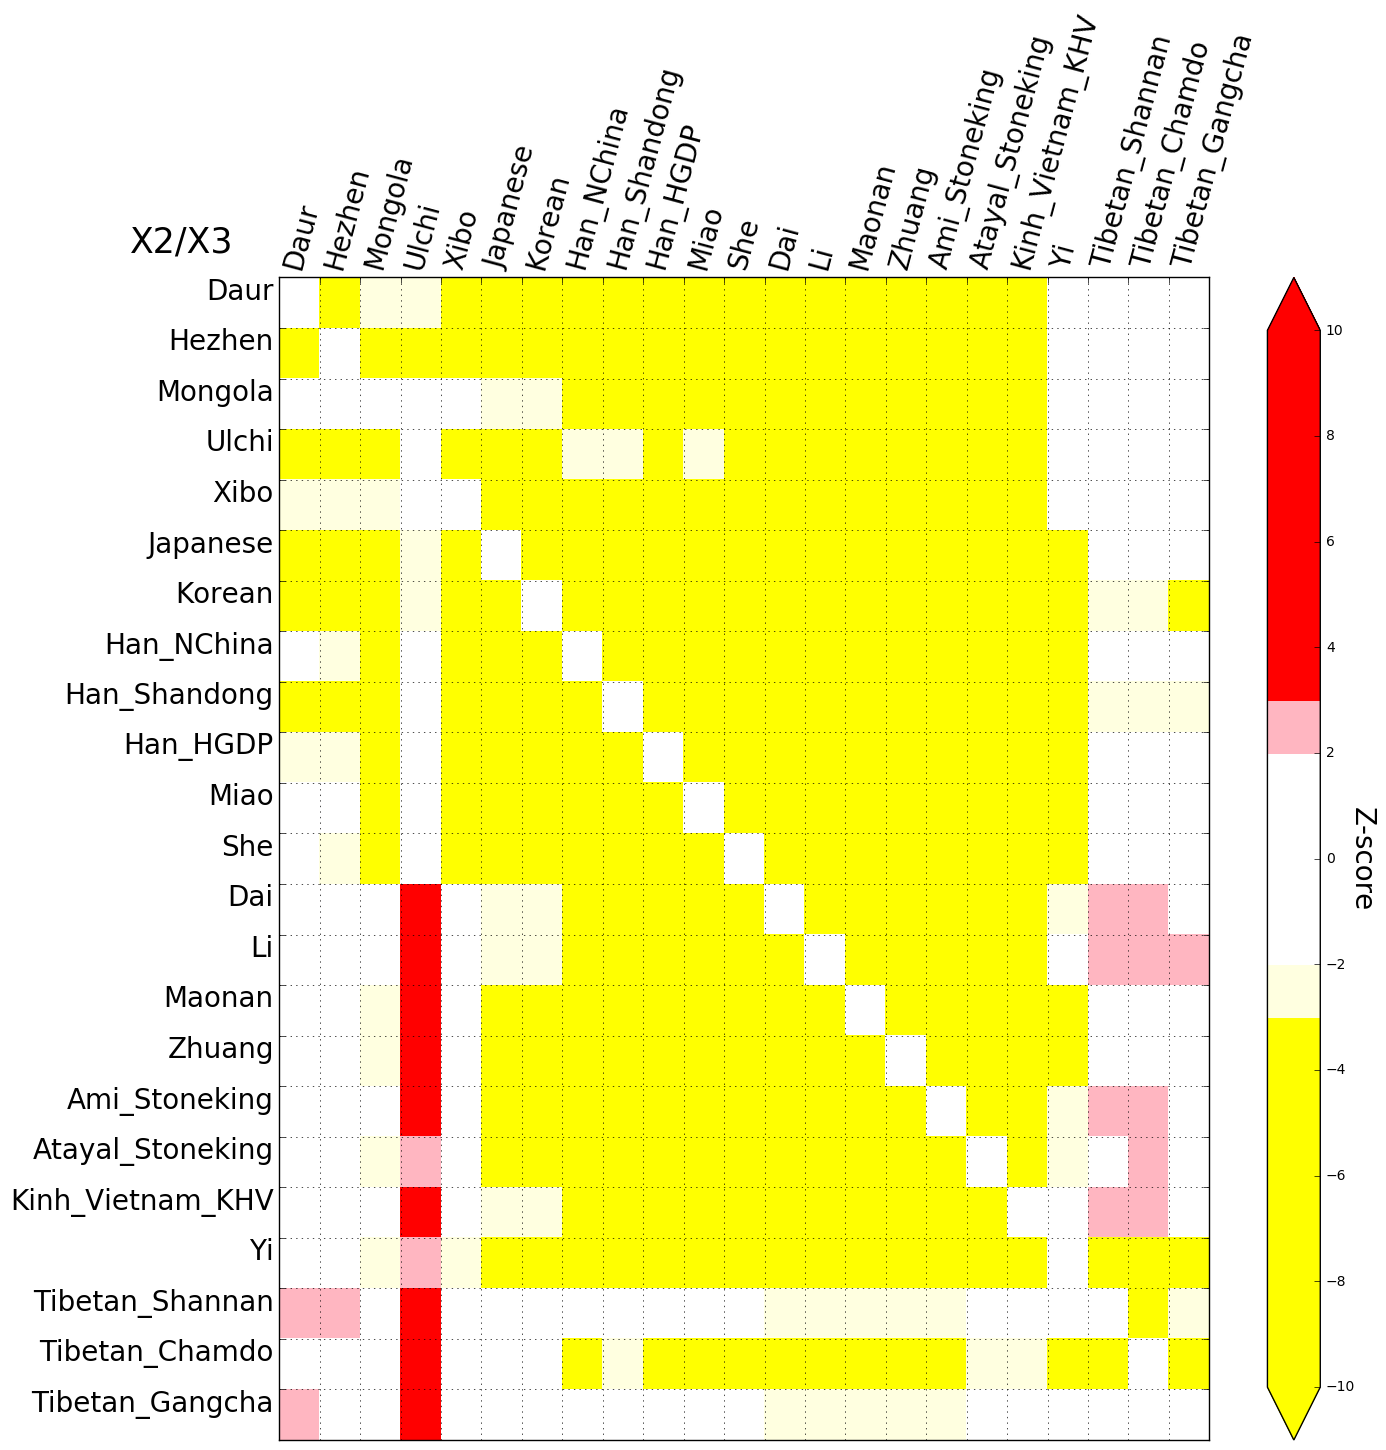

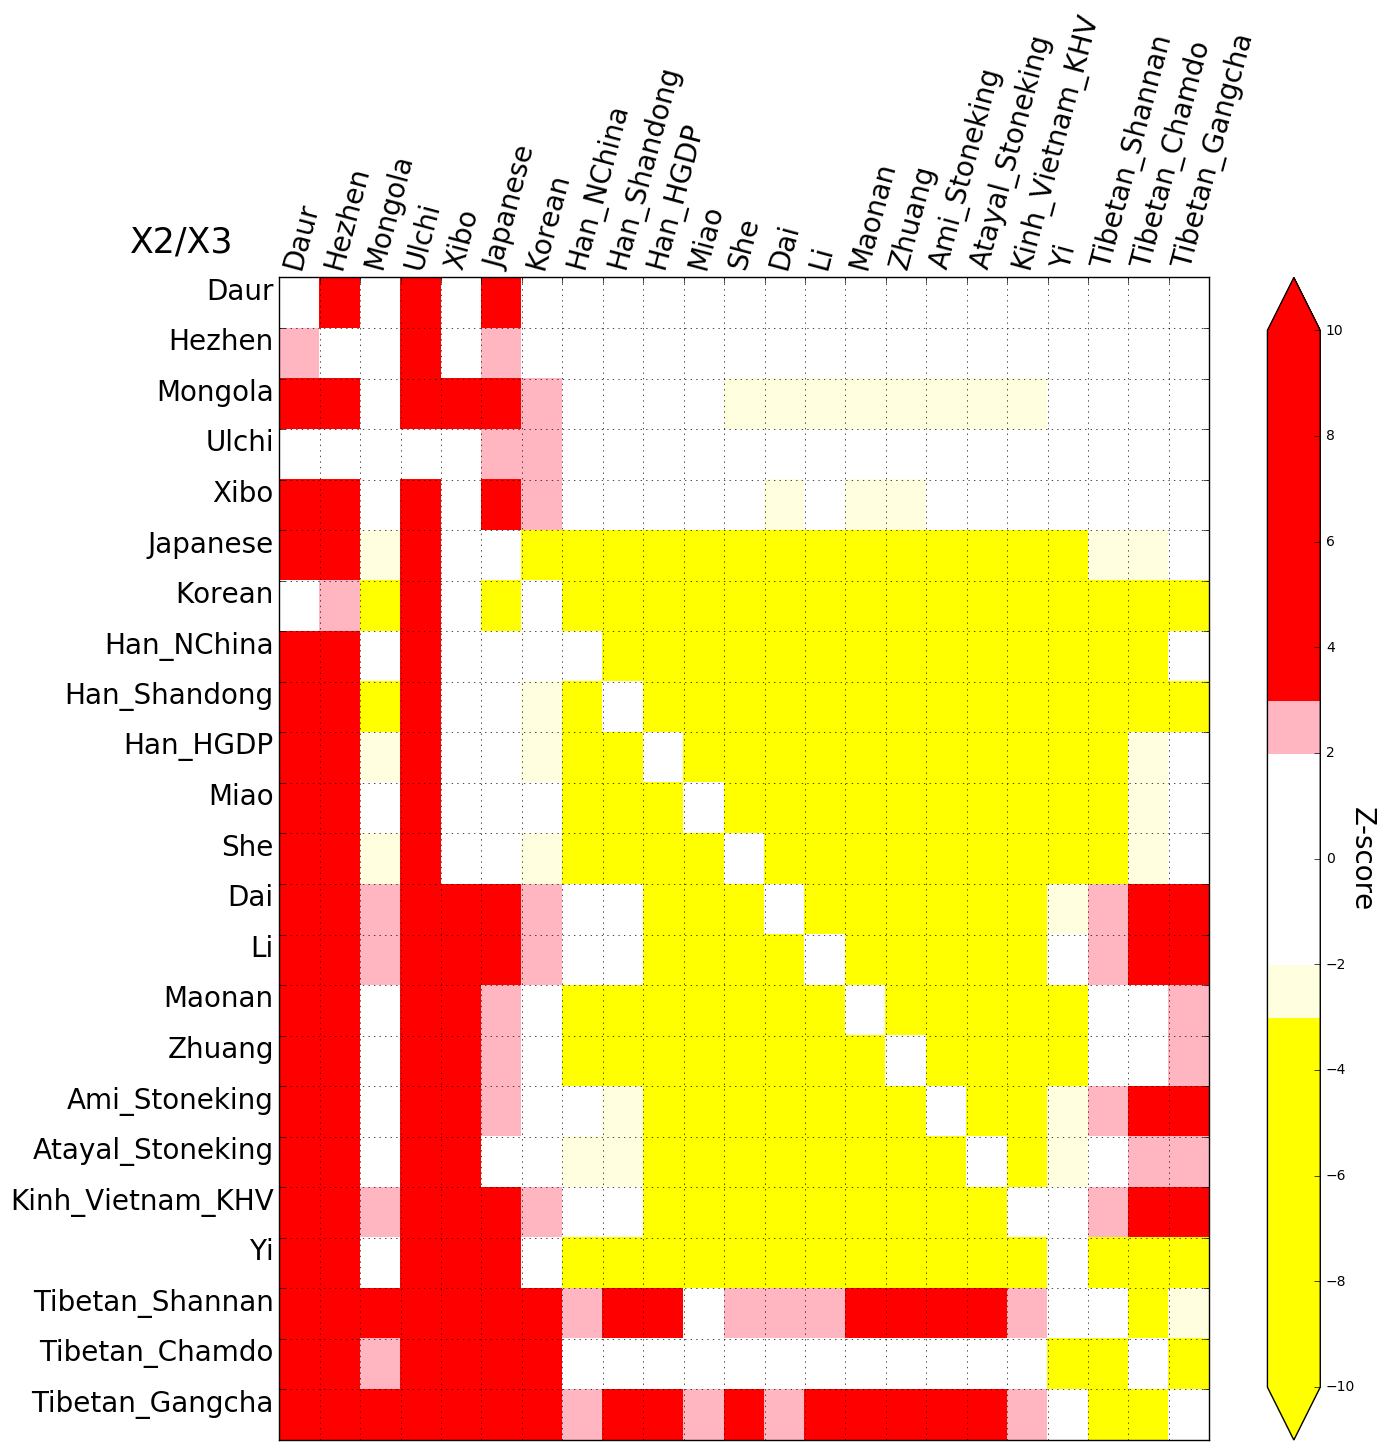

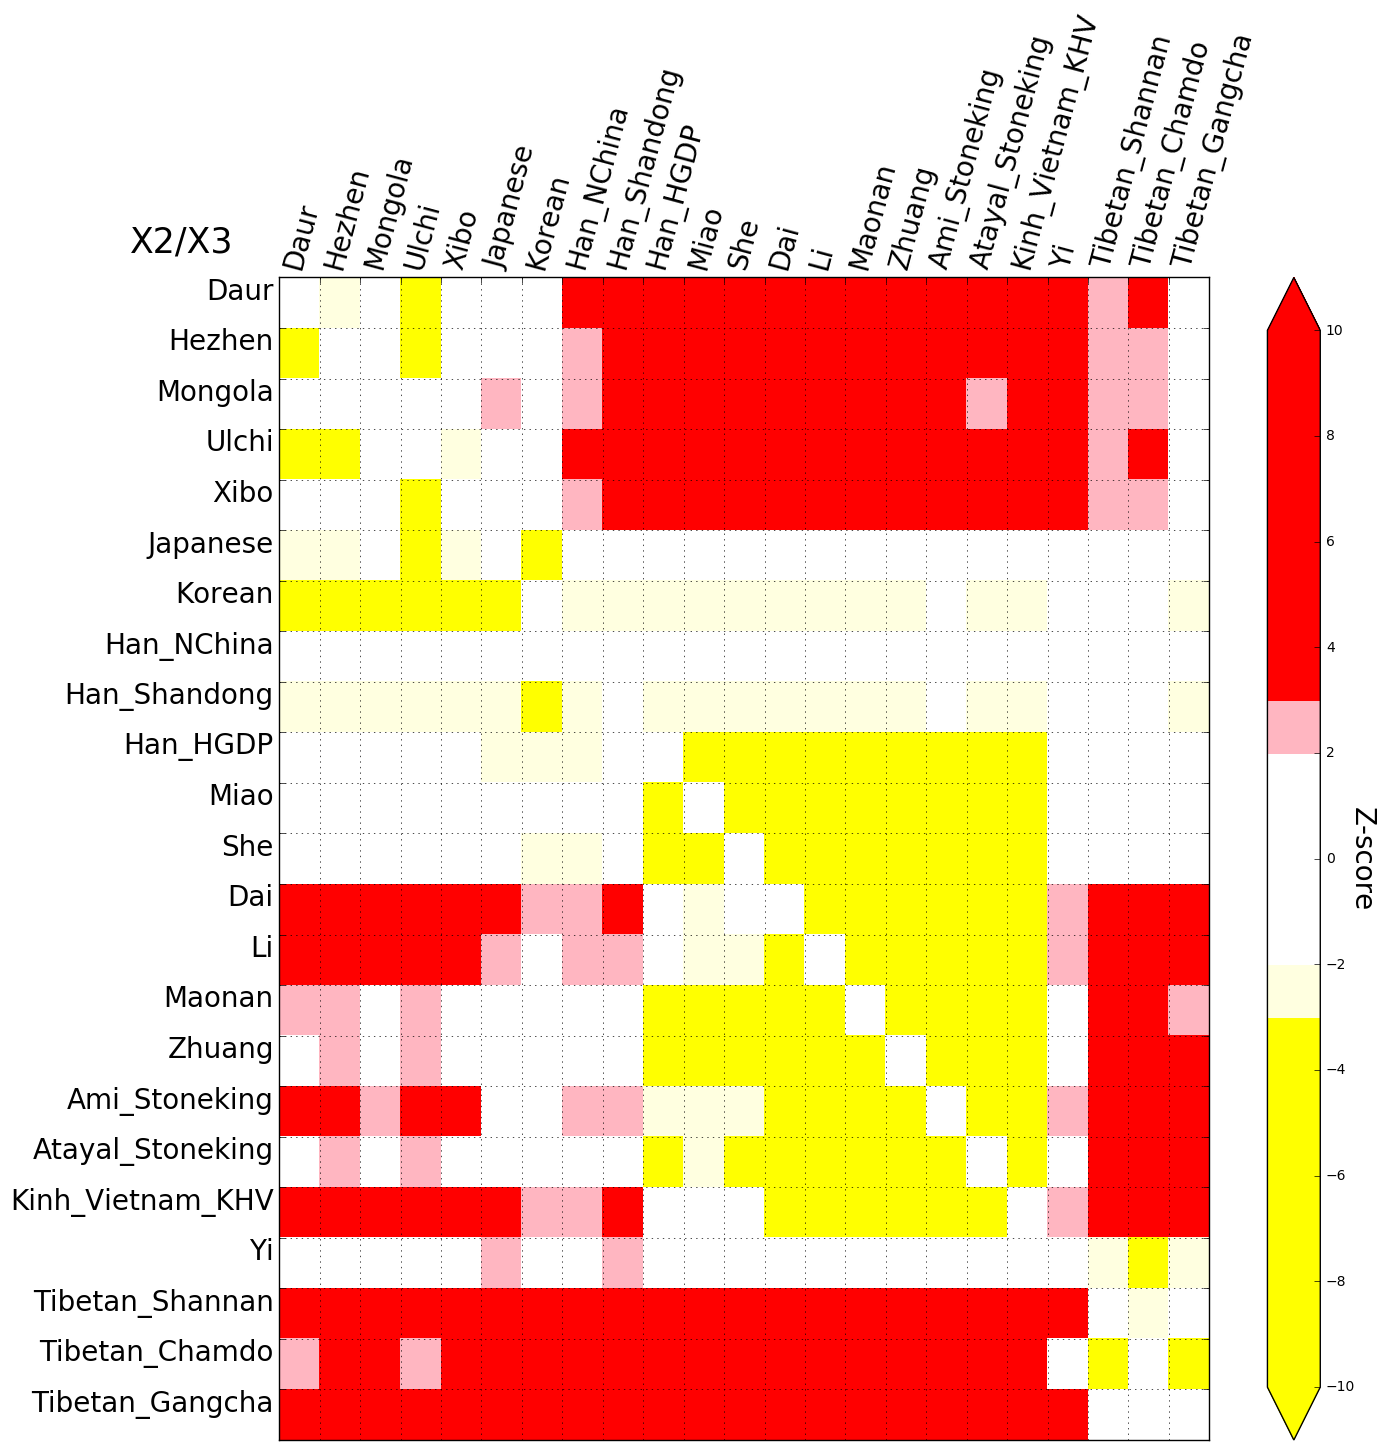

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import projmodules as pm
import numpy as np

fh='ind_A_v13_TBH5'
pD='/home/mel_yang/projects/neolithic/Dstats/'
allmypops=['Daur','Hezhen','Mongola','Ulchi','Xibo','Japanese','Korean','Han_NChina','Han_Shandong', 
       'Han_HGDP','Dai','Li','Maonan','Miao','She','Zhuang','Ami_Stoneking','Atayal_Stoneking',
       'Kinh_Vietnam_KHV','Yi','Tibetan_Shannan','Tibetan_Chamdo','Tibetan_Gangcha']
wantedpops = ['Daur','Hezhen','Mongola','Ulchi','Xibo','Japanese','Korean','Han_NChina','Han_Shandong', 
       'Han_HGDP','Miao','She','Dai','Li','Maonan','Zhuang','Ami_Stoneking','Atayal_Stoneking',
       'Kinh_Vietnam_KHV','Yi','Tibetan_Shannan','Tibetan_Chamdo','Tibetan_Gangcha']
wantedindices = [allmypops.index(i) for ind,i in enumerate(wantedpops)]
print wantedindices
myp3s = ["Bbdong","Boshan","HDYM1","Boisman_MN","Linzi"]
fs = 20

for myp3 in myp3s:
    #subset,mypops=("all.PDEAS_PDEAS_%s_Mbuti" % myp3,"X1/X2")
    subset,mypops=("all.%s_PDEAS_PDEAS_Mbuti" % myp3,"X2/X3")

    myfile = open(pD+fh+'.D.'+subset+'.Zmat','r')
    print pD+fh+'.D.'+subset+'.Zmat'
    badindex='NA'
    for ind,line in enumerate(myfile):
        x = line.strip().split()
        if ind==0:
            header1 = [i for i in x[1:]]
            if 'Pops' in header1: 
                badindex=header1.index('Pops')
                header1.remove('Pops')
            mydata,header2=[],[]
            continue
        header2.append(x[0])
        if badindex!='NA': del x[badindex+1]
        mydata.append([float(i) if i != 'nan' else 0 for i in x[1:]])
    myary=np.array(mydata)
    if 'tp' in subset: myary = np.transpose(myary)
    levels = range(-10,11)
    multiplier=((len(levels)-6)/2)+1
    colors = ['yellow']*multiplier + ['#FFFFE0'] + ['white']*4 + ['lightpink'] + ['red']*multiplier
    cmap1,norm = matplotlib.colors.from_levels_and_colors(levels, colors,extend='both')
    #wantedindices = [0,2,3,4,12,14,16,19,20,21,22,25,26,27,29,30,32,36]
    #wantedindices1, wantedindices2 = wantedindices, wantedindices
    #wantedindices1 = range(14,31) #range(len(header1)) #range(14,31)
    #wantedindices2 = range(3,31) #range(len(header2)) #range(3,31)
    wantedindices1, wantedindices2 = wantedindices, wantedindices
    #wantedindices1 = range(len(header1)) #range(14,31)
    #wantedindices2 = range(len(header2)) #range(3,31)
    header1 = [i for ind,i in enumerate(header1) if ind in wantedindices1]
    header2 = [i for ind,i in enumerate(header2) if ind in wantedindices2]
    myary = myary[wantedindices2,:][:,wantedindices1]


    ##FIGURE    
    fig,ax = plt.subplots(figsize=(15,15))
    heatmap = ax.pcolor(myary ,cmap=cmap1, vmin=-10,vmax=10)
    cbar=plt.colorbar(heatmap)
    
    ##LEGEND
    #cbar.ax.text(.5, 0.25, '$D<0$', color='black', ha='center', va='center',fontsize=fs-22)
    #cbar.ax.text(.5, 0.5, '$N.S.$', color='black', ha='center', va='center',fontsize=fs-22)
    #cbar.ax.text(.5, 0.75, '$D>0$', color='black', ha='center', va='center',fontsize=fs-22)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Z-score', rotation=270,fontsize=fs)
    #cbar.ax.set_yticks((-10,10),fontsize=fs)
    
    ax.grid(True)
    ax.set_xticks(np.arange(len(header1)), minor=False)
    ax.set_yticks(np.arange(len(header2)), minor=False)
    
    ax.xaxis.tick_top()
    
    column_labels = wantedpops #header1
    row_labels = wantedpops #header2
    ax.set_xlim((0,len(header1)))
    ax.set_ylim((0,len(header2)))
    ax.set_xticklabels(column_labels, minor=False,fontsize=fs,rotation=75,ha='left')
    ax.set_yticklabels(row_labels, minor=False,fontsize=fs,va='top')
    ax.invert_yaxis()

    ax.text(-3.7,-0.5,mypops,fontsize=fs+5)
    
    x=3
    plt.savefig(pD+fh+'.D.'+subset+'.D.png',bbox_inches='tight')
